In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-regression-data-challenge/submission.csv
/kaggle/input/2022-regression-data-challenge/train.csv
/kaggle/input/2022-regression-data-challenge/test.csv


# PROJECT TOPIC: MEDICAL CONDITION SCORING SYSTEM

# Project Overview:
The goal of this project is to create a machine learning model that can predict a patient's medical condition based on their medical history. 

Clinical scoring systems help medical practitioners to:
1. determine severity of illness
2. make right and timely decisions.
3. select the right treatment options.
4. manage clinical risk.
5. improve efficiency.


# Data Analysis
### __Data Wrangling__

In [2]:
#import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read in the datasets
train = pd.read_csv("/kaggle/input/2022-regression-data-challenge/train.csv")
test = pd.read_csv("/kaggle/input/2022-regression-data-challenge/test.csv")
sub = pd.read_csv("/kaggle/input/2022-regression-data-challenge/submission.csv")

In [4]:
#View the the first 5 lines of each dataframe
display(train.head())
display(test.head())
display(sub.head())

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,403,34.130,0.00243,0.000018,0.00108,0.00124,0.00323,0.01147,0.105,0.00625,...,-0.824511,-1.217875,-0.432389,-1.455320,-0.280675,0.681113,0.375320,0.764563,-0.237859,-0.282198
1,1477,19.000,0.00280,0.000021,0.00087,0.00128,0.00260,0.01575,0.137,0.00812,...,0.080466,-0.812559,1.512731,0.070331,2.368754,-0.256309,1.315997,0.093631,-0.389538,1.396095
2,5342,43.104,0.00412,0.000028,0.00162,0.00213,0.00487,0.02644,0.242,0.01150,...,-0.060555,-0.027766,-0.123652,0.820478,1.054439,1.922146,-1.262435,2.017997,0.687229,-0.935456
3,3812,38.814,0.00781,0.000043,0.00451,0.00399,0.01353,0.02975,0.261,0.01650,...,-0.153332,-1.298289,1.410486,1.950012,0.613255,0.492419,0.124454,0.891332,0.401179,0.383195
4,138,41.034,0.00488,0.000026,0.00265,0.00251,0.00794,0.04983,0.448,0.02688,...,-0.985639,-0.469064,-2.579920,0.173884,-0.330941,0.089597,0.617369,-0.183967,0.408726,1.607871


,Id,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,1178,0.00465,0.000021,0.00253,0.00254,0.00760,0.01743,0.184,0.00858,0.00974,...,-0.622937,-0.345015,-0.172781,1.632996,-0.819828,1.026481,-1.395062,1.065962,-1.854161,0.424490
1,4954,0.03805,0.000184,0.01723,0.02981,0.05170,0.15431,1.450,0.07356,0.13302,...,-0.563150,-0.403509,-1.149322,0.152665,-0.053284,-0.287827,-0.119217,0.612956,-0.731272,-0.608852
2,1269,0.01094,0.000123,0.00429,0.00502,0.01288,0.04010,0.368,0.01749,0.02065,...,0.077701,-0.061947,0.581850,-0.059723,0.226147,1.613662,0.114775,0.170831,0.159562,-0.571270
3,5269,0.00414,0.000022,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,...,-0.106470,0.923359,-1.290854,0.959982,0.232197,-0.669471,-0.049756,-0.110285,0.437221,-1.399420
4,143,0.00688,0.000041,0.00390,0.00307,0.01171,0.04896,0.419,0.03117,0.02345,...,-0.216855,0.516351,1.194716,-0.451112,-0.063620,-1.356854,-0.093523,0.219119,0.943376,0.146435


,Id,Expected
0,1178,-2.342984
1,4954,-0.657429
2,1269,0.332369
3,5269,-0.334584
4,143,1.412328


In [5]:
#View the shape of the dataset
display(train.shape)
display(test.shape)
display(sub.shape)

(4141, 29)

(1734, 28)

(1734, 2)

In [6]:
#View summary information on the dataset
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1734 non-null   int64  
 1   V3      1734 non-null   float64
 2   V4      1734 non-null   float64
 3   V5      1734 non-null   float64
 4   V6      1734 non-null   float64
 5   V7      1734 non-null   float64
 6   V8      1734 non-null   float64
 7   V9      1734 non-null   float64
 8   V10     1734 non-null   float64
 9   V11     1734 non-null   float64
 10  V12     1734 non-null   float64
 11  V13     1734 non-null   float64
 12  V14     1734 non-null   float64
 13  V15     1734 non-null   float64
 14  V16     1734 non-null   float64
 15  V17     1734 non-null   float64
 16  V18     1734 non-null   float64
 17  V19     1734 non-null   float64
 18  V20     1734 non-null   float64
 19  V21     1734 non-null   float64
 20  V22     1734 non-null   float64
 21  V23     1734 non-null   float64
 22  

None

In [7]:
#Check for missing values
display(train.isna().sum())
display(test.isna().sum())

Id       0
score    0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
dtype: int64

Id     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
dtype: int64

In [8]:
#Check for duplicates
display(train.duplicated().sum())
display(test.duplicated().sum())

0

0

In [9]:
#View summary statistics of the train dataset
display(train.describe())

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2940.652499,29.121340,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,...,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,1699.192364,10.755535,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,...,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,1.000000,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,...,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,1475.000000,21.371000,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,...,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,2946.000000,27.630000,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,...,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,4415.000000,36.483000,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,...,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,5873.000000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,...,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


__Observation from Data Wrangling__

# Exploratory Data Analysis

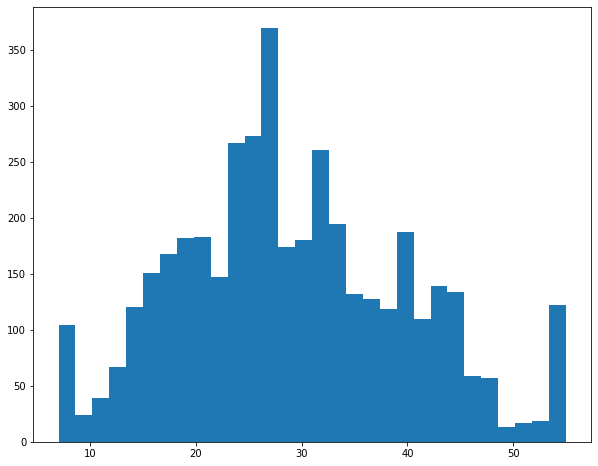

In [10]:
#Distribution of target variable 'Score'

plt.figure(figsize=(10,8))
plt.hist(train.score, bins = 30);

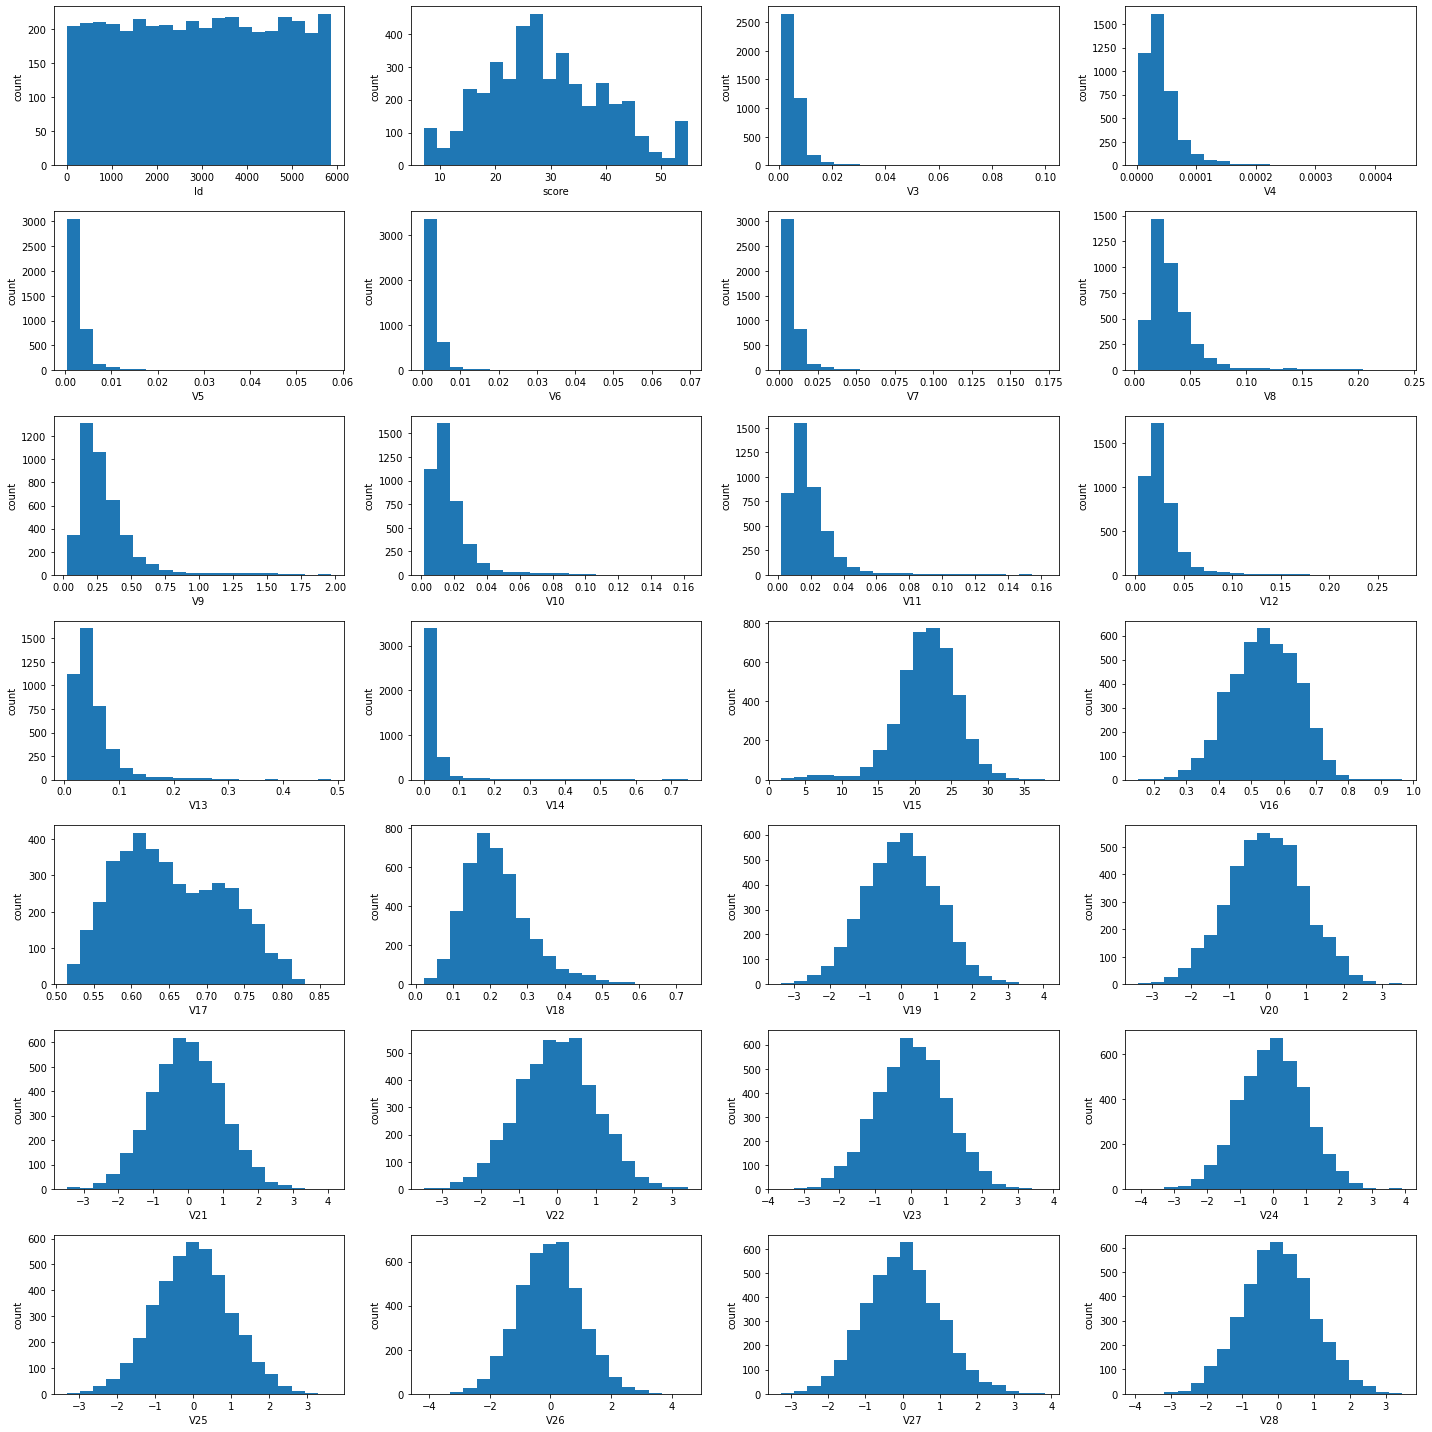

In [11]:
# Distribution of other features
#Create subplots
def subplot(plot_index, nrows=7, ncols=4):
  plt.subplot(nrows, ncols, plot_index)
  plt.tight_layout()

#get all the columns in the data
x = train.columns
plt.figure(figsize=(20,20))
for i in range(len(x)-1):
  subplot(i+1)
  plt.hist(x[i], data=train, bins=20)
  plt.xlabel(x[i]);
  plt.ylabel('count')

#### __Observation__
* The distribution of score is slightly normal.
* Quite a number of features have the same pattern of normal distribution:
> V5 and V7 <br/>
> V4 and V10 <br/>
> V21 and V25

__What is the relationship between score and other features__

In [12]:
#Correlation matrix of the train dataset.
corr = train.corr();
corr

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
Id,1.000000,0.248855,0.119623,0.059431,0.105701,0.125111,0.105714,0.136908,0.133446,0.103193,...,0.002938,-0.020184,-0.025020,-0.032426,-0.000464,0.002638,-0.000161,0.028787,-0.015695,-0.006901
score,0.248855,1.000000,0.061977,0.055533,0.050209,0.054069,0.050226,0.079528,0.086131,0.064929,...,0.026254,-0.043407,0.010219,0.003865,-0.021065,-0.000255,0.011327,-0.018741,-0.021500,0.016380
V3,0.119623,0.061977,1.000000,0.858551,0.984355,0.967857,0.984356,0.687538,0.694096,0.641016,...,0.021759,-0.007524,-0.007565,-0.003686,0.003182,0.032171,0.024200,0.005431,0.021432,0.002638
V4,0.059431,0.055533,0.858551,1.000000,0.836409,0.788864,0.836410,0.638569,0.646049,0.612200,...,0.014409,-0.017084,-0.000955,-0.018691,-0.003036,0.026615,0.029823,0.003331,0.030929,-0.002536
V5,0.105701,0.050209,0.984355,0.836409,1.000000,0.949419,1.000000,0.659151,0.662775,0.625510,...,0.020588,-0.005321,-0.004289,-0.001092,0.003322,0.030734,0.021750,0.007902,0.022699,0.001569
V6,0.125111,0.054069,0.967857,0.788864,0.949419,1.000000,0.949423,0.712702,0.713624,0.656803,...,0.021586,-0.000387,-0.015763,-0.009403,0.001833,0.031195,0.019342,0.008415,0.019146,0.006590
V7,0.105714,0.050226,0.984356,0.836410,1.000000,0.949423,1.000000,0.659151,0.662776,0.625506,...,0.020592,-0.005332,-0.004300,-0.001103,0.003347,0.030718,0.021757,0.007902,0.022720,0.001577
V8,0.136908,0.079528,0.687538,0.638569,0.659151,0.712702,0.659151,1.000000,0.992303,0.979974,...,0.038662,-0.003704,-0.038372,-0.008634,0.001584,0.021130,0.003264,0.006378,-0.007035,0.017151
V9,0.133446,0.086131,0.694096,0.646049,0.662775,0.713624,0.662776,0.992303,1.000000,0.968306,...,0.039578,-0.006037,-0.039076,-0.005793,0.001652,0.021313,0.002002,0.005127,-0.007696,0.018939
V10,0.103193,0.064929,0.641016,0.612200,0.625510,0.656803,0.625506,0.979974,0.968306,1.000000,...,0.033543,-0.003268,-0.033411,-0.005224,0.001308,0.020043,0.002815,0.007953,-0.012854,0.021003


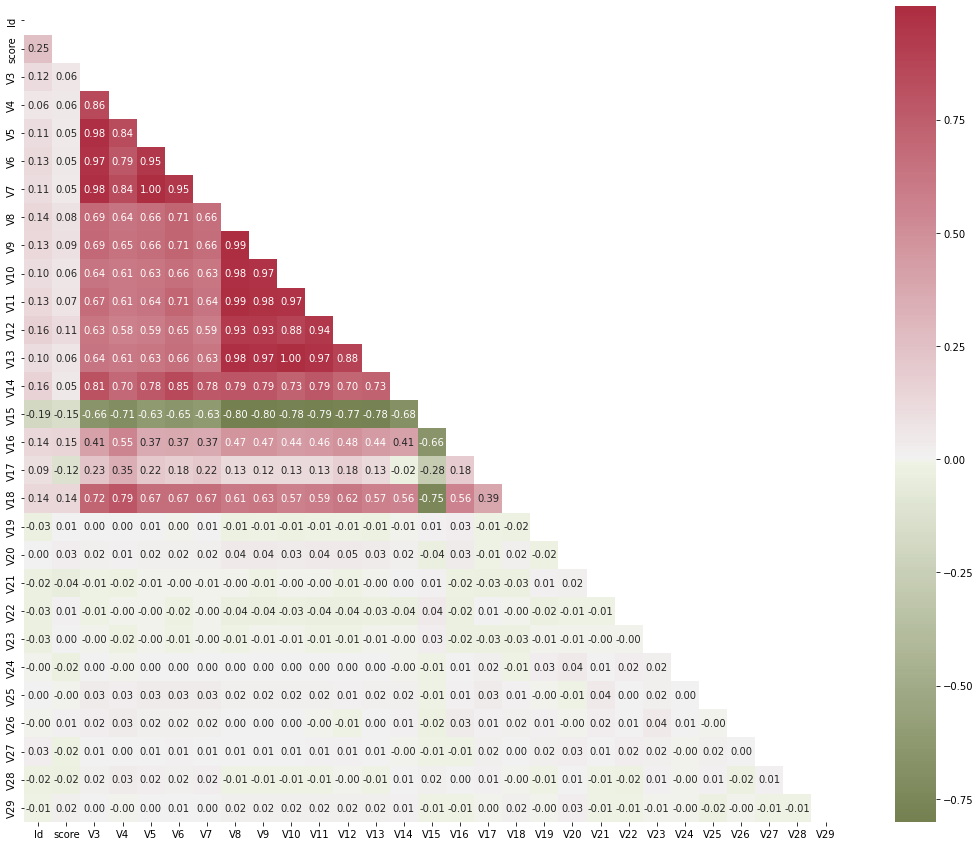

In [13]:
# Correlation heatmap of the train dataframe

#set figsize
plt.figure(figsize=(20,15))
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap);

__Observation:__ 
* Most of the features has very low correlation with the target feature (score).

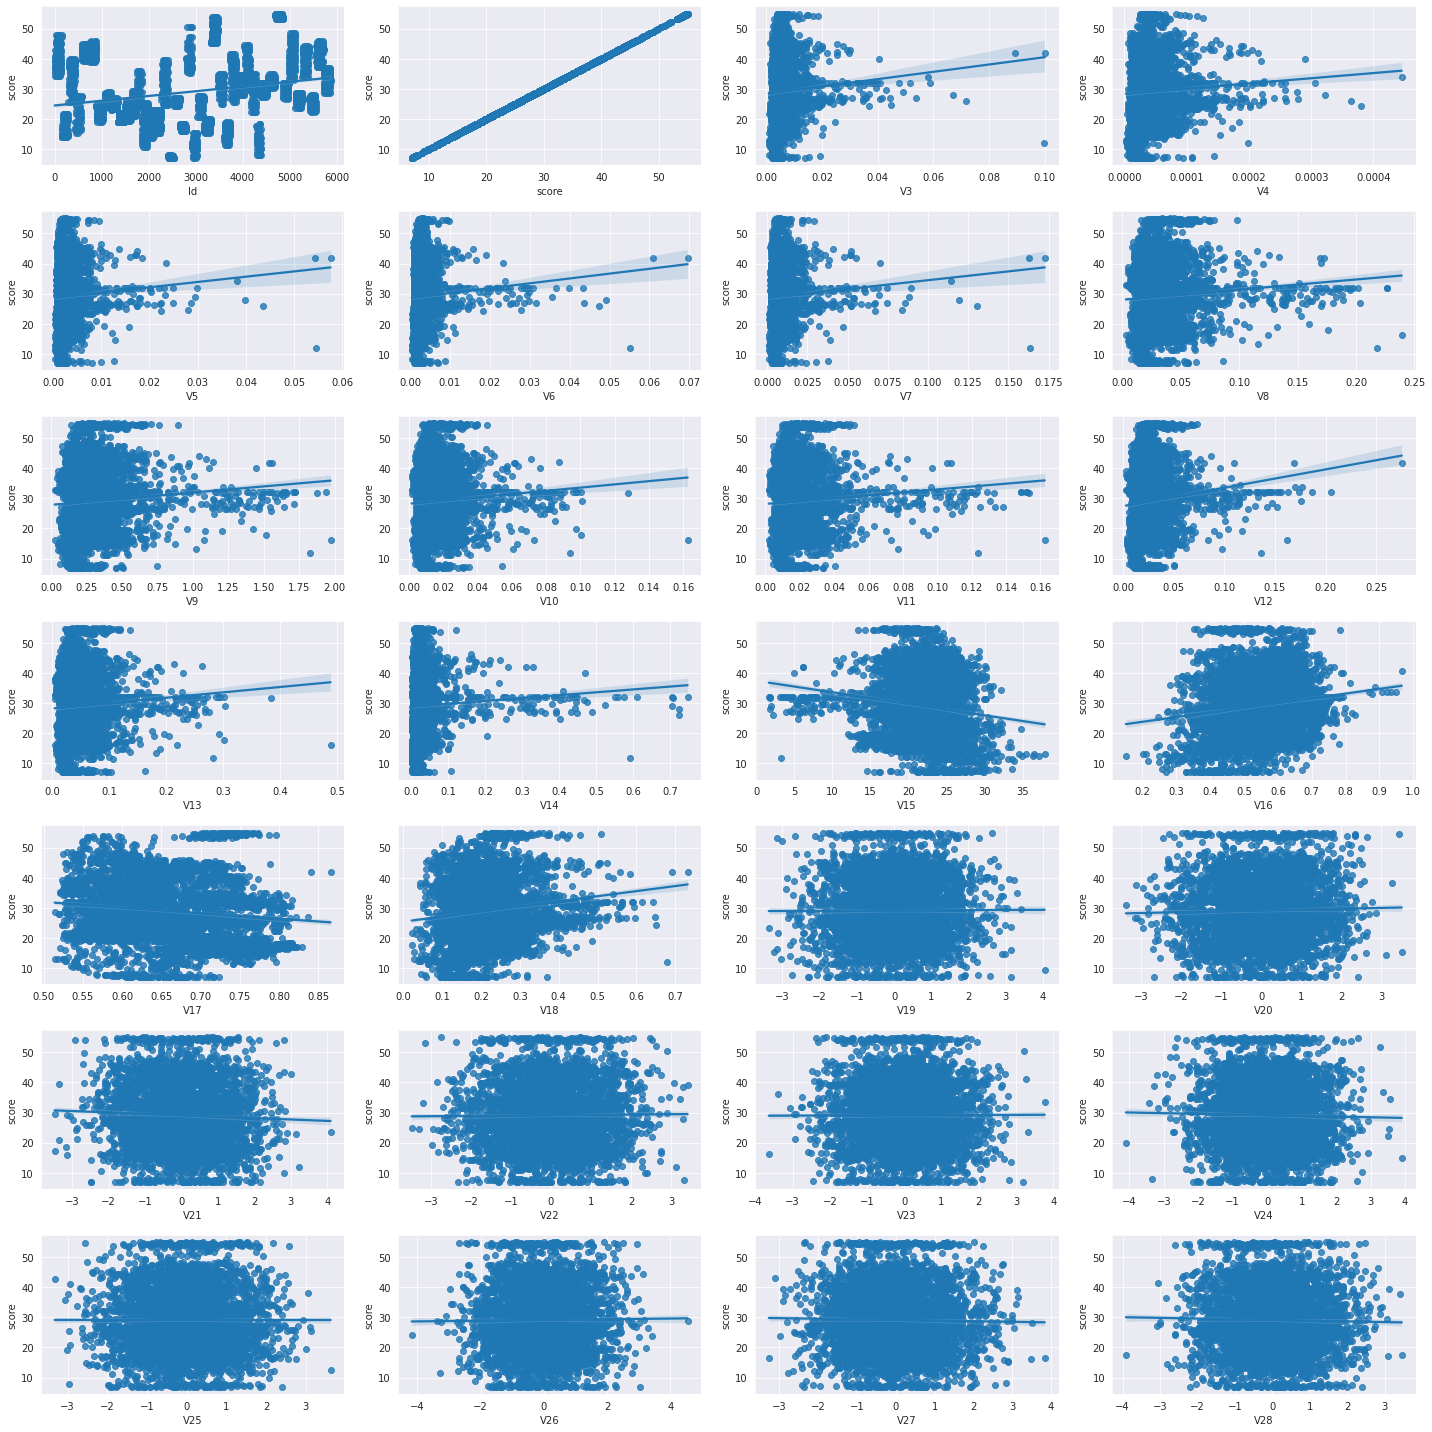

In [14]:
#Visualize the relationship between the features in the train dataset 

#regplot is used instead of pairsplot since we only need to visualize the 
#relationship between scores and other features. The large nature of the 
#dataset was also considered.

#set style
sns.set_style('darkgrid')

#Create subplots
def subplot(plot_index, nrows=7, ncols=4):
  plt.subplot(nrows, ncols, plot_index)
  plt.tight_layout()

    
#get all the columns in the data
x = train.columns

#set figure size
plt.figure(figsize=(20,20))

#plotting
for i in range(len(x)-1):
  subplot(i+1)
  sns.regplot(x[i], train["score"], data=train);
  plt.xlabel(x[i]);

__Observation:__
* There is a pattern in the correlation of Id features with score.
* There is little to no linear correlation between most of the features and 'Score'.

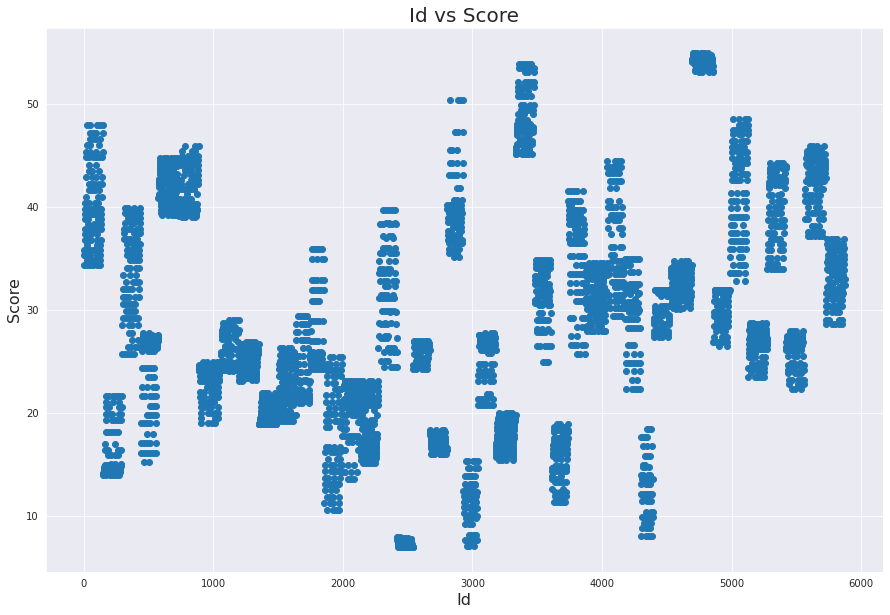

In [15]:
#Bigger Visualization of correlation between score and Id to view the pattern
plt.figure(figsize=(15,10))
plt.scatter(data=train, x='Id', y='score' )
plt.title('Id vs Score', fontsize=20)
plt.xlabel('Id', fontsize=16)
plt.ylabel('Score', fontsize=16);

# Machine Learning
* From the EDA, it was discovered that the score of each patient have a relationship with their Id.

* This means that that the Id are not just random numbers. 

> Creating a model without the Id column will result in low model accuracy and high mean square error as shown below:

In [16]:
#Drop the score from the train df to get the features and select target(score)
features = train.drop('score', axis=1)
target = train['score']
test = test
print(test.shape)
print(features.shape)
print(target.shape)

(1734, 28)
(4141, 28)
(4141,)


__Model Training (Linear Regression)__

In [17]:
#import sklearn train_test_split to split the dataset into train and test set
from sklearn.model_selection import train_test_split
#import the sklearn linear regression package
from sklearn.linear_model import LinearRegression
#import mse
from sklearn.metrics import mean_squared_error

In [18]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state =42)

In [19]:
#Create a model object
model = LinearRegression()

In [20]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

### __Model Evaluation__

In [21]:
#Score the model on the training set
model.score(X_train, y_train)

0.15981103714561995

In [22]:
#Score the model on the test set
model.score(X_test, y_test)

0.13358932056133654

In [23]:
#Prediction on the test datset given
pred = model.predict(X_test)

In [24]:
#calculate the RMSE
mean_squared_error(y_test, pred, squared=False)

10.260014930455583

### Observation: 

> Apart from the fact that the Id column is needed to get a better accuracy and error, the sklearn linear regression model does not seem to work well.

> Since there is no linear correlation between the features and score,Polynomial transformation will be performed on the features.

## __Using Polynomial regression__

In [25]:
#import polynomialfeatures
from sklearn.preprocessing import PolynomialFeatures

In [26]:
#Polynomial transformation
poly_model = LinearRegression() 
poly = PolynomialFeatures(3)

X = train.drop('score', axis=1).values
y = train.score.values

poly_features = poly.fit_transform(X)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [27]:
poly_model.fit(Xp_train, yp_train)

LinearRegression()

In [28]:
poly_model.score(Xp_train, yp_train)

0.8916208273715936

In [29]:
poly_model.score(Xp_test, yp_test)

-413.2209362003739

In [30]:
poly_predicted = poly_model.predict(Xp_test)

In [31]:
mean_squared_error(yp_test, poly_predicted, squared=False)

224.33762474737793

#### __Observation__
* The prediction obtained from the polynomial regression is very poor.
* The Lazy Predict will be used to obtain the models that works better.

### __Model Selection (Lazy Predict)__

In [32]:
#installing the lazypredict
!pip install lazypredict

In [33]:
#import required libraries
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [34]:
#Lazy regressor
X = train.drop(['score'], axis = 1)
y= train.score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42)

In [35]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [13:18<00:00, 19.01s/it]


In [36]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.92,0.92,3.03,6.10
BaggingRegressor,0.91,0.92,3.21,0.63
XGBRegressor,0.91,0.91,3.30,1.60
LGBMRegressor,0.89,0.89,3.64,0.46
HistGradientBoostingRegressor,0.89,0.89,3.64,0.66
ExtraTreesRegressor,0.87,0.88,3.84,2.20
GradientBoostingRegressor,0.86,0.86,4.05,2.87
DecisionTreeRegressor,0.84,0.85,4.28,0.19
ExtraTreeRegressor,0.51,0.53,7.58,0.07


### Observation
It can be deduced from the result generated by the lazy prediction above that the RandomForestRegressor model performs better.

## __Model Training (RandomForestRegressor)__

In [37]:
#import random regressor 
from sklearn.ensemble import RandomForestRegressor

#Create the regressor object
reg_model = RandomForestRegressor(max_depth = 11, random_state=0)


X = train.drop('score', axis=1)
y = train.score.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42)


#fit the model
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [38]:
#Score the model on the training set
reg_model.score(X_train,y_train)

0.978617093986579

In [39]:
#Score the model on the test set
reg_model.score(X_test,y_test)

0.9245048378731685

In [40]:
#Make predictions on the test data
y_pred = reg_model.predict(X_test)

Text(0.5, 1.0, 'Actual  vs Predicted')

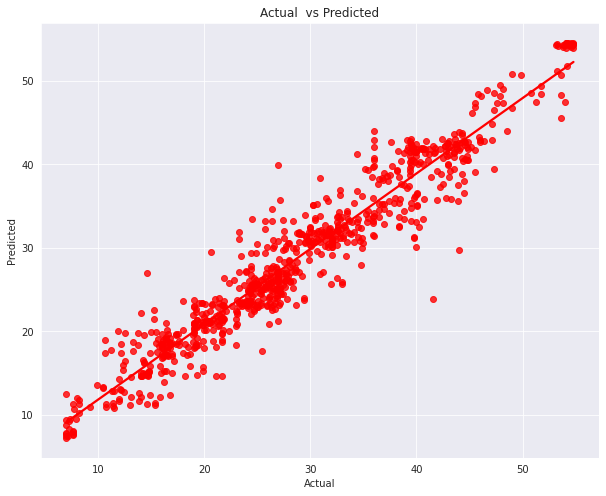

In [41]:
# Plot of Predicted score vs Actual score
plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Actual  vs Predicted')

__Model Evaluation__

In [42]:
#Calculate the Root mean square error(RMSE)
mean_squared_error(y_test, y_pred, squared=False)

3.0286260633372244

#### __Feature Selection__
> Feature selection is done to enhance the model. Models with zero importance will be dropped.

In [43]:
# Get numerical feature importances
importances = list(reg_model.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Features: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Features: Id                   Importance: 0.77
Features: V17                  Importance: 0.11
Features: V4                   Importance: 0.02
Features: V15                  Importance: 0.02
Features: V12                  Importance: 0.01
Features: V16                  Importance: 0.01
Features: V18                  Importance: 0.01
Features: V3                   Importance: 0.0
Features: V5                   Importance: 0.0
Features: V6                   Importance: 0.0
Features: V7                   Importance: 0.0
Features: V8                   Importance: 0.0
Features: V9                   Importance: 0.0
Features: V10                  Importance: 0.0
Features: V11                  Importance: 0.0
Features: V13                  Importance: 0.0
Features: V14                  Importance: 0.0
Features: V19                  Importance: 0.0
Features: V20                  Importance: 0.0
Features: V21                  Importance: 0.0
Features: V22                  Importance: 0.0
Featur

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

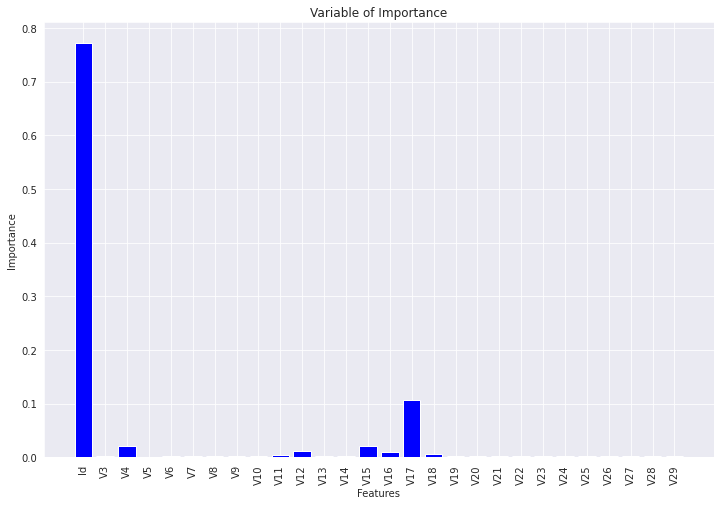

In [44]:
# Plot of important features

plt.figure(figsize=(12,8))

#x-tick location
x_values = list(range(len(importances)))
plt.bar(x_values, importances,  color = 'b')

# x-tick labels
plt.xticks(x_values, feature_list, rotation='vertical')

#labels
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Variable of Importance');

In [45]:
#drop the less important features
X_new = train[['Id', 'V4', 'V11', 'V12', 'V15', 'V16', 'V17', 'V18']]
test_data = test[['Id', 'V4', 'V11', 'V12', 'V15', 'V16', 'V17', 'V18']]

In [46]:
#Split the new df with important features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.2, random_state =42)

#fit the model
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [47]:
print(reg_model.score(X_train, y_train))
print(reg_model.score(X_test, y_test))

0.9780934231490365
0.9287717353440933


### __Observation__
As expected, the model accuracy did not change much after feature selection, since random forest utilizes relevant features.

However, the model is overfitted. Hyperparameter tuning is needed to reduce the overfitting. <br/>
One way to prune the random forest is reducing the maximum-related parameters and increasing the minimum-related parameters

## __Hyperparameter Tuning__

In [48]:
#Hyperparameter tuning - Cross validation

reg_model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.2, random_state =42)
#Define the parameters

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
}


from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(reg_model,parameters,cv=5)
cv.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [49]:
def show(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [50]:
show(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 250}


0.329 + or -0.069 for the {'max_depth': 2, 'n_estimators': 5}
0.37 + or -0.02 for the {'max_depth': 2, 'n_estimators': 10}
0.365 + or -0.024 for the {'max_depth': 2, 'n_estimators': 50}
0.364 + or -0.038 for the {'max_depth': 2, 'n_estimators': 100}
0.366 + or -0.031 for the {'max_depth': 2, 'n_estimators': 250}
0.632 + or -0.018 for the {'max_depth': 4, 'n_estimators': 5}
0.638 + or -0.018 for the {'max_depth': 4, 'n_estimators': 10}
0.639 + or -0.016 for the {'max_depth': 4, 'n_estimators': 50}
0.638 + or -0.015 for the {'max_depth': 4, 'n_estimators': 100}
0.641 + or -0.018 for the {'max_depth': 4, 'n_estimators': 250}
0.881 + or -0.015 for the {'max_depth': 8, 'n_estimators': 5}
0.897 + or -0.009 for the {'max_depth': 8, 'n_estimators': 10}
0.902 + or -0.009 for the {'max_depth': 8, 'n_estimators': 50}
0.901 + or -0.009 for the {'max_depth': 8, 'n_estimators': 100}
0.903 + or -0.009 for the {'max_depth': 8, 'n_estimators

In [51]:
#Using the best parameters
reg_model = RandomForestRegressor(max_depth = 32, n_estimators = 250, 
                                  min_samples_split=35, min_samples_leaf=3)
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, min_samples_leaf=3, min_samples_split=35,
                      n_estimators=250)

In [52]:
reg_model.score(X_train, y_train)

0.9488893891163622

In [53]:
reg_model.score(X_test, y_test)

0.9210995937367747

In [54]:
ypred = reg_model.predict(X_test)

In [55]:
#Calculate the Root mean square error(RMSE)
mean_squared_error(y_test, ypred, squared=False)

3.0961765289594156

### __Visualizing the Decision tree__

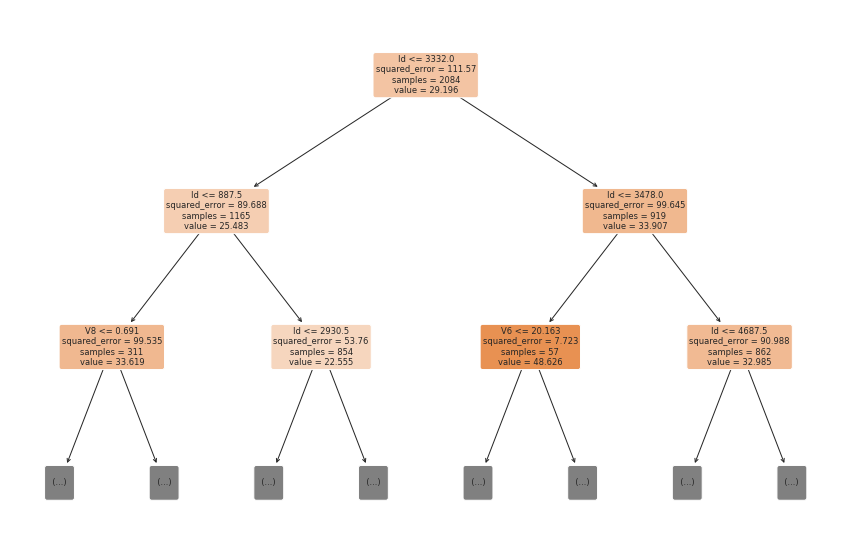

In [56]:
from sklearn.tree import plot_tree


fig = plt.figure(figsize=(15, 10))
plot_tree(reg_model.estimators_[0], 
          feature_names=X.columns,
          class_names=train.score,max_depth = 2, 
          filled=True, impurity=True, 
          rounded=True);


### __Prediction (on the test data provided for the competition)__

In [57]:
test_preds = reg_model.predict(test_data)

In [58]:
#Replacing the expected column in the test column with the predicted values
sub['Expected'] = test_preds

In [59]:
sub.head()

,Id,Expected
0,1178,25.05
1,4954,30.42
2,1269,24.53
3,5269,26.29
4,143,41.10


In [60]:
submission = sub.to_csv('/kaggle/working/submission_file.csv', index=False)

# Conclusion
The model depend mainly on the patient Id and this may be attributed to the act of sorting patient into categories based on their health status. More defining features is needed to make more accurate prediction of patient's vital status.